In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import NPD Tops spreadsheet from website

In [ ]:
npd_link = r'https://npdfactpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_formation_top&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=84.208.221.128&CultureCode=en'

tops = pd.read_csv(npd_link)

columns = list(tops.columns)

rename = ["Well", "MD", "Base", "Surface", "Level", "Parent", "Id", "LithoStrat", "LithoStratParent", "Date", "Sync"]

rename_cols = dict(zip(columns,rename))

tops.rename(columns=rename_cols, inplace=True)

# Remove GP names from the list
#data[ data.duplicated(subset=['Well', 'MD'], keep='last')].Surface.str.contains("GP")
tops = tops[ ~tops['Surface'].str.contains("GP")]

# Remove MBR names from the list
#data[ data.duplicated(subset=['Well', 'MD'], keep='last')].Surface.str.contains("MBR")
tops = tops[ ~tops['Surface'].str.contains("MBR")]

tops.drop(['Level', 'Parent', 'Id', 'LithoStrat', 'LithoStratParent', 'Date', 'Sync'], axis=1, inplace=True)

## Import Petrel tops

In [ ]:
petrel_tops = pd.read_csv('tops.csv')

petrel_tops.rename(columns={'Well identifier':'Well', 'Z':'TVDSS','TWT auto':'TWT'}, inplace=True)

petrel_tops.TVDSS = petrel_tops['TVDSS']*-1

# Remove rows that have Surface named in del_rows

del_rows = ['UNDIFFERENTIATED', 'NO FORMAL NAME', 'NO GROUP DEFINED', 'UNDEFINED GP']

for i in range(len(del_rows)):
    petrel_tops = petrel_tops[ petrel_tops.Surface != del_rows[i]]

# Replace misspelled Formation names with correct spelling

typos = {'Surface' : {'STﾘ FM':'STØ FM', 'TUBﾅEN FM':'TUBÅEN FM', '?RRET FM':'ØRRET FM',
         'R?YE FM':'RØYE FM', '?RN FM':'ØRN FM', 'ISBJ?RN FM':'ISBJØRN FM', 'BL坦EROT FM':'BLÆREROT FM'}}

petrel_tops.replace(typos, inplace=True)

### THIS ASSUMES THAT ONLY FORMATION TOPS WILL BE USED ###

# Remove GP names from the list
#data[ data.duplicated(subset=['Well', 'MD'], keep='last')].Surface.str.contains("GP")
petrel_tops = petrel_tops[ ~petrel_tops['Surface'].str.contains("GP")]

# Remove MBR names from the list
#data[ data.duplicated(subset=['Well', 'MD'], keep='last')].Surface.str.contains("MBR")
petrel_tops = petrel_tops[ ~petrel_tops['Surface'].str.contains("MBR")]

## Merge NPD and Petrel dataframes

In [130]:
merge = pd.merge(tops,petrel_tops)

C:\Users\Dunbar\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:969: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


In [ ]:
merge['Thickness'] = merge['Base'] - merge['MD']

In [292]:
merge[merge['Well'] == '7120/1-1 R2'].sort_values(by=['MD'])

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness
57,7120/1-1 R2,490,692,TORSK FM,475816.56,7980018.58,464.99,575.68,202
62,7120/1-1 R2,692,1106,FRUHOLMEN FM,475816.59,7980015.76,666.96,757.86,414
56,7120/1-1 R2,1106,2285,SNADD FM,475816.14,7980015.31,1080.96,1067.07,1179
68,7120/1-1 R2,2285,2315,KOBBE FM,475801.04,7980006.31,2259.77,1761.48,30
67,7120/1-1 R2,2315,2373,KLAPPMYSS FM,475800.09,7980005.89,2289.75,1777.62,58
63,7120/1-1 R2,2373,2403,HAVERT FM,475798.10,7980005.12,2347.71,1805.59,30
65,7120/1-1 R2,2403,2430,ØRRET FM,475797.08,7980004.72,2377.69,1818.44,27
59,7120/1-1 R2,2430,2458,RØYE FM,475796.05,7980004.51,2404.67,1829.89,28
66,7120/1-1 R2,2458,2604,ØRRET FM,475794.80,7980004.54,2432.64,1840.52,146
60,7120/1-1 R2,2604,2997,RØYE FM,475785.42,7980003.56,2578.29,1910.48,393


In [295]:
tops[tops['Well'] == '7120/1-1 R2'].sort_values(by=['MD'])

,Well,MD,Base,Surface
2756,7120/1-1 R2,490,692,TORSK FM
2765,7120/1-1 R2,692,1106,FRUHOLMEN FM
2755,7120/1-1 R2,1106,2285,SNADD FM
2773,7120/1-1 R2,2285,2315,KOBBE FM
2772,7120/1-1 R2,2315,2373,KLAPPMYSS FM
2767,7120/1-1 R2,2373,2403,HAVERT FM
2769,7120/1-1 R2,2403,2430,ØRRET FM
2761,7120/1-1 R2,2430,2458,RØYE FM
2770,7120/1-1 R2,2458,2604,ØRRET FM
2762,7120/1-1 R2,2604,2997,RØYE FM


In [296]:
petrel_tops[petrel_tops['Well'] == '7120/1-1 R2'].sort_values(by=['MD'])

,Well,Surface,X,Y,TVDSS,MD,TWT
2,7120/1-1 R2,TORSK FM,475816.56,7980018.58,464.99,490.0,575.68
4,7120/1-1 R2,FRUHOLMEN FM,475816.59,7980015.76,666.96,692.0,757.86
5,7120/1-1 R2,SNADD FM,475816.14,7980015.31,1080.96,1106.0,1067.07
7,7120/1-1 R2,KOBBE FM,475801.04,7980006.31,2259.77,2285.0,1761.48
8,7120/1-1 R2,KLAPPMYSS FM,475800.09,7980005.89,2289.75,2315.0,1777.62
9,7120/1-1 R2,HAVERT FM,475798.10,7980005.12,2347.71,2373.0,1805.59
10,7120/1-1 R2,ØRRET FM,475797.08,7980004.72,2377.69,2403.0,1818.44
13,7120/1-1 R2,RØYE FM,475796.05,7980004.51,2404.67,2430.0,1829.89
11,7120/1-1 R2,ØRRET FM,475794.80,7980004.54,2432.64,2458.0,1840.52
14,7120/1-1 R2,RØYE FM,475785.42,7980003.56,2578.29,2604.0,1910.48


In [328]:
wells = list(merge.Well.unique())
well_list = []
for well in wells:
    well = well.replace('/','_')
    well = well.replace('-', '_')
    well = well.replace(" ","")
    well = 'X' + well
    well_list.append(well)
print(well_list)

['X7220_11_3AR', 'X7220_11_1', 'X7220_10_1', 'X7219_12_1', 'X7120_2_3S', 'X7120_2_1', 'X7120_1_4S', 'X7120_1_3', 'X7120_1_1R2']


In [392]:
well_dict = {}
for i,j in zip(well_list, wells):
    well_dict[i]=j
print(well_dict)

{'X7220_11_3AR': '7220/11-3 AR', 'X7220_11_1': '7220/11-1', 'X7220_10_1': '7220/10-1', 'X7219_12_1': '7219/12-1', 'X7120_2_3S': '7120/2-3 S', 'X7120_2_1': '7120/2-1', 'X7120_1_4S': '7120/1-4 S', 'X7120_1_3': '7120/1-3', 'X7120_1_1R2': '7120/1-1 R2'}


In [399]:
def isochron(df):
    frame = pd.DataFrame()
    for k,v in well_dict.items():
        k = df[df['Well']==v].sort_values(by=['MD'])
        k['TWT_d'] = k['TWT'].shift(-1)
        k['Isochron'] = (k['TWT_d'] - k['TWT']) / 2000
        frame = frame.append(k)
    return frame

result2 = isochron(merge)

In [400]:
result2

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron
2,7220/11-3 AR,429,575,TORSK FM,483741.51,7991463.79,404.00,531.87,146,694.30,0.081215
6,7220/11-3 AR,575,601,KOLMULE FM,483740.68,7991462.61,549.99,694.30,26,720.98,0.013340
0,7220/11-3 AR,601,1982,SNADD FM,483739.89,7991462.08,575.97,720.98,1381,1552.74,0.415880
7,7220/11-3 AR,1982,2013,KOBBE FM,484098.71,7991287.78,1826.15,1552.74,31,1570.41,0.008835
5,7220/11-3 AR,2013,2064,KLAPPMYSS FM,484110.64,7991283.54,1854.44,1570.41,51,1617.93,0.023760
4,7220/11-3 AR,2124,2252,ØRN FM,484152.47,7991269.61,1956.30,1617.93,128,1663.42,0.022745
3,7220/11-3 AR,2252,2535,FALK FM,484203.65,7991252.45,2072.32,1663.42,283,1766.22,0.051400
1,7220/11-3 AR,2535,2600,UGLE FM,484318.29,7991221.25,2329.03,1766.22,65,NaN,NaN
12,7220/11-1,447,556,TORSK FM,484389.68,7995617.39,417.00,544.34,109,637.19,0.046425
9,7220/11-1,556,580,KOLMULE FM,484390.34,7995617.88,525.99,637.19,24,659.19,0.011000


In [201]:
W7120_1_1_R2 = merge[merge['Well']=='7120/1-1 R2'].sort_values(by=['MD'])
W7120_1_1_R2['TWT_d'] = W7120_1_1_R2['TWT'].shift(-1)
W7120_1_1_R2['Isochron'] = (W7120_1_1_R2['TWT_d'] - W7120_1_1_R2['TWT']) / 2000
W7120_1_1_R2['Vint'] = W7120_1_1_R2['Thickness'] / W7120_1_1_R2['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
57,7120/1-1 R2,490,692,TORSK FM,475816.56,7980018.58,464.99,575.68,202,757.86,0.091090,2217.587002
62,7120/1-1 R2,692,1106,FRUHOLMEN FM,475816.59,7980015.76,666.96,757.86,414,1067.07,0.154605,2677.791792
56,7120/1-1 R2,1106,2285,SNADD FM,475816.14,7980015.31,1080.96,1067.07,1179,1761.48,0.347205,3395.688426
68,7120/1-1 R2,2285,2315,KOBBE FM,475801.04,7980006.31,2259.77,1761.48,30,1777.62,0.008070,3717.472119
67,7120/1-1 R2,2315,2373,KLAPPMYSS FM,475800.09,7980005.89,2289.75,1777.62,58,1805.59,0.013985,4147.300679
63,7120/1-1 R2,2373,2403,HAVERT FM,475798.10,7980005.12,2347.71,1805.59,30,1818.44,0.006425,4669.260700
65,7120/1-1 R2,2403,2430,ØRRET FM,475797.08,7980004.72,2377.69,1818.44,27,1829.89,0.005725,4716.157205
59,7120/1-1 R2,2430,2458,RØYE FM,475796.05,7980004.51,2404.67,1829.89,28,1840.52,0.005315,5268.109125
66,7120/1-1 R2,2458,2604,ØRRET FM,475794.80,7980004.54,2432.64,1840.52,146,1910.48,0.034980,4173.813608
60,7120/1-1 R2,2604,2997,RØYE FM,475785.42,7980003.56,2578.29,1910.48,393,2047.14,0.068330,5751.500073


In [202]:
W7220_11_3_AR = merge[merge['Well']=='7220/11-3 AR'].sort_values(by=['MD'])
W7220_11_3_AR['TWT_d'] = W7220_11_3_AR['TWT'].shift(-1)
W7220_11_3_AR['Isochron'] = (W7220_11_3_AR['TWT_d'] - W7220_11_3_AR['TWT']) / 2000
W7220_11_3_AR['Vint'] = W7220_11_3_AR['Thickness'] / W7220_11_3_AR['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
2,7220/11-3 AR,429,575,TORSK FM,483741.51,7991463.79,404.00,531.87,146,694.30,0.081215,1797.697470
6,7220/11-3 AR,575,601,KOLMULE FM,483740.68,7991462.61,549.99,694.30,26,720.98,0.013340,1949.025487
0,7220/11-3 AR,601,1982,SNADD FM,483739.89,7991462.08,575.97,720.98,1381,1552.74,0.415880,3320.669424
7,7220/11-3 AR,1982,2013,KOBBE FM,484098.71,7991287.78,1826.15,1552.74,31,1570.41,0.008835,3508.771930
5,7220/11-3 AR,2013,2064,KLAPPMYSS FM,484110.64,7991283.54,1854.44,1570.41,51,1617.93,0.023760,2146.464646
4,7220/11-3 AR,2124,2252,ØRN FM,484152.47,7991269.61,1956.30,1617.93,128,1663.42,0.022745,5627.610464
3,7220/11-3 AR,2252,2535,FALK FM,484203.65,7991252.45,2072.32,1663.42,283,1766.22,0.051400,5505.836576
1,7220/11-3 AR,2535,2600,UGLE FM,484318.29,7991221.25,2329.03,1766.22,65,NaN,NaN,NaN


In [203]:
W7220_11_1 = merge[merge['Well']=='7220/11-1'].sort_values(by=['MD'])
W7220_11_1['TWT_d'] = W7220_11_1['TWT'].shift(-1)
W7220_11_1['Isochron'] = (W7220_11_1['TWT_d'] - W7220_11_1['TWT']) / 2000
W7220_11_1['Vint'] = W7220_11_1['Thickness'] / W7220_11_1['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
12,7220/11-1,447,556,TORSK FM,484389.68,7995617.39,417.00,544.34,109,637.19,0.046425,2347.872913
9,7220/11-1,556,580,KOLMULE FM,484390.34,7995617.88,525.99,637.19,24,659.19,0.011000,2181.818182
14,7220/11-1,580,1852,SNADD FM,484390.24,7995617.97,549.99,659.19,1272,1531.82,0.436315,2915.324937
8,7220/11-1,1852,1895,KOBBE FM,484383.71,7995616.80,1821.95,1531.82,43,1555.48,0.011830,3634.826712
10,7220/11-1,1895,1898,KLAPPMYSS FM,484383.55,7995616.56,1864.95,1555.48,3,1568.87,0.006695,448.095594
11,7220/11-1,1923,2118,FALK FM,484383.36,7995616.35,1892.95,1568.87,195,1653.45,0.042290,4611.019153
13,7220/11-1,2118,2251,UGLE FM,484379.28,7995615.19,2087.89,1653.45,133,NaN,NaN,NaN


In [204]:
W7220_10_1 = merge[merge['Well']=='7220/10-1'].sort_values(by=['MD'])
W7220_10_1['TWT_d'] = W7220_10_1['TWT'].shift(-1)
W7220_10_1['Isochron'] = (W7220_10_1['TWT_d'] - W7220_10_1['TWT']) / 2000
W7220_10_1['Vint'] = W7220_10_1['Thickness'] / W7220_10_1['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
18,7220/10-1,474,1272,TORSK FM,467502.99,7991180.58,439.99,563.54,798,1228.08,0.332270,2401.661300
22,7220/10-1,1272,1456,KOLMULE FM,467503.23,7991179.91,1237.99,1228.08,184,1342.58,0.057250,3213.973799
23,7220/10-1,1456,1484,KOLJE FM,467503.26,7991179.25,1421.99,1342.58,28,1361.47,0.009445,2964.531498
24,7220/10-1,1484,1499,HEKKINGEN FM,467503.26,7991179.24,1449.99,1361.47,15,1371.91,0.005220,2873.563218
20,7220/10-1,1499,1513,FUGLEN FM,467503.26,7991179.21,1464.99,1371.91,14,1380.85,0.004470,3131.991051
17,7220/10-1,1513,1645,STØ FM,467503.25,7991179.19,1478.99,1380.85,132,1453.96,0.036555,3610.997128
15,7220/10-1,1645,1832,NORDMELA FM,467503.23,7991179.03,1610.99,1453.96,187,1550.62,0.048330,3869.232361
19,7220/10-1,1832,1931,TUBÅEN FM,467503.22,7991179.04,1797.99,1550.62,99,1602.12,0.025750,3844.660194
21,7220/10-1,1931,2303,FRUHOLMEN FM,467503.25,7991179.12,1896.99,1602.12,372,1794.16,0.096020,3874.192876
16,7220/10-1,2303,2405,SNADD FM,467503.90,7991178.85,2268.99,1794.16,102,NaN,NaN,NaN


In [206]:
W7219_12_1 = merge[merge['Well']=='7219/12-1'].sort_values(by=['MD'])
W7219_12_1['TWT_d'] = W7219_12_1['TWT'].shift(-1)
W7219_12_1['Isochron'] = (W7219_12_1['TWT_d'] - W7219_12_1['TWT']) / 2000
W7219_12_1['Vint'] = W7219_12_1['Thickness'] / W7219_12_1['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
26,7219/12-1,1503,1653,TUBÅEN FM,458309.40,8013252.93,1502.99,1409.86,150,1498.61,0.044375,3380.28169
25,7219/12-1,1653,2169,FRUHOLMEN FM,458306.61,8013254.71,1652.95,1498.61,516,NaN,NaN,NaN


In [207]:
W7120_2_3_S = merge[merge['Well']=='7120/2-3 S'].sort_values(by=['MD'])
W7120_2_3_S['TWT_d'] = W7120_2_3_S['TWT'].shift(-1)
W7120_2_3_S['Isochron'] = (W7120_2_3_S['TWT_d'] - W7120_2_3_S['TWT']) / 2000
W7120_2_3_S['Vint'] = W7120_2_3_S['Thickness'] / W7120_2_3_S['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
30,7120/2-3 S,375,1441,TORSK FM,477754.64,7965750.51,351.50,331.71,1066,1336.30,0.502295,2122.258832
36,7120/2-3 S,1441,1702,KOLMULE FM,477719.91,7965780.35,1416.01,1336.30,261,1535.07,0.099385,2626.150828
35,7120/2-3 S,1702,1932,KOLJE FM,477708.15,7965791.02,1676.52,1535.07,230,1675.03,0.069980,3286.653330
37,7120/2-3 S,1932,2000,KNURR FM,477695.29,7965802.50,1905.85,1675.03,68,1714.87,0.019920,3413.654618
34,7120/2-3 S,2000,2018,HEKKINGEN FM,477690.74,7965806.83,1973.56,1714.87,18,1726.21,0.005670,3174.603175
33,7120/2-3 S,2018,2071,FUGLEN FM,477689.59,7965808.04,1991.48,1726.21,53,1756.61,0.015200,3486.842105
27,7120/2-3 S,2071,2221,STØ FM,477686.32,7965811.06,2044.30,1756.61,150,1824.96,0.034175,4389.173372
31,7120/2-3 S,2221,2299,NORDMELA FM,477677.55,7965819.05,2193.82,1824.96,78,1862.77,0.018905,4125.892621
29,7120/2-3 S,2299,2363,TUBÅEN FM,477675.11,7965820.81,2271.74,1862.77,64,1890.59,0.013910,4601.006470
32,7120/2-3 S,2363,2563,FRUHOLMEN FM,477674.25,7965820.07,2335.70,1890.59,200,1983.12,0.046265,4322.922295


In [208]:
W7120_2_1 = merge[merge['Well']=='7120/2-1'].sort_values(by=['MD'])
W7120_2_1['TWT_d'] = W7120_2_1['TWT'].shift(-1)
W7120_2_1['Isochron'] = (W7120_2_1['TWT_d'] - W7120_2_1['TWT']) / 2000
W7120_2_1['Vint'] = W7120_2_1['Thickness'] / W7120_2_1['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
39,7120/2-1,476,613,TORSK FM,481923.84,7987306.24,453.00,584.46,137,708.53,0.062035,2208.430725
38,7120/2-1,613,1933,SNADD FM,481920.18,7987310.83,589.87,708.53,1320,1577.85,0.434660,3036.856394
44,7120/2-1,1933,1945,KOBBE FM,481905.67,7987324.81,1909.65,1577.85,12,1584.11,0.003130,3833.865815
43,7120/2-1,1945,2024,ØRN FM,481905.48,7987324.97,1921.64,1584.11,79,1615.38,0.015635,5052.766230
42,7120/2-1,2024,2221,FALK FM,481903.99,7987326.12,2000.62,1615.38,197,1691.76,0.038190,5158.418434
40,7120/2-1,2221,2624,UGLE FM,481898.83,7987329.45,2197.52,1691.76,403,2202.97,0.255605,1576.651474
41,7120/2-1,3471,3502,BASEMENT,481870.70,7987494.27,3428.84,2202.97,31,NaN,NaN,NaN


In [209]:
W7120_1_4_S = merge[merge['Well']=='7120/1-4 S'].sort_values(by=['MD'])
W7120_1_4_S['TWT_d'] = W7120_1_4_S['TWT'].shift(-1)
W7120_1_4_S['Isochron'] = (W7120_1_4_S['TWT_d'] - W7120_1_4_S['TWT']) / 2000
W7120_1_4_S['Vint'] = W7120_1_4_S['Thickness'] / W7120_1_4_S['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
46,7120/1-4 S,451,733,TORSK FM,471248.14,7982516.39,421.00,537.67,282,797.19,0.129760,2173.242910
45,7120/1-4 S,733,2274,SNADD FM,471248.15,7982515.38,702.98,797.19,1541,1763.32,0.483065,3190.046888
49,7120/1-4 S,2274,2285,KOBBE FM,471253.23,7982514.35,2243.94,1763.32,11,1769.56,0.003120,3525.641026
48,7120/1-4 S,2285,2301,KLAPPMYSS FM,471253.54,7982514.17,2254.93,1769.56,16,1783.27,0.006855,2334.062728
47,7120/1-4 S,2314,2520,RØYE FM,471254.38,7982513.67,2283.92,1783.27,206,NaN,NaN,NaN


In [210]:
W7120_1_3 = merge[merge['Well']=='7120/1-3'].sort_values(by=['MD'])
W7120_1_3['TWT_d'] = W7120_1_3['TWT'].shift(-1)
W7120_1_3['Isochron'] = (W7120_1_3['TWT_d'] - W7120_1_3['TWT']) / 2000
W7120_1_3['Vint'] = W7120_1_3['Thickness'] / W7120_1_3['Isochron']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
54,7120/1-3,436,689,TORSK FM,474679.74,7978470.12,411.99,535.43,253,765.31,0.114940,2201.148425
52,7120/1-3,689,1101,FRUHOLMEN FM,474679.87,7978469.63,664.99,765.31,412,1073.31,0.154000,2675.324675
55,7120/1-3,1101,2203,SNADD FM,474680.07,7978470.92,1076.98,1073.31,1102,1728.17,0.327430,3365.604862
50,7120/1-3,2203,2244,KOBBE FM,474658.39,7978476.07,2178.57,1728.17,41,1751.02,0.011425,3588.621444
51,7120/1-3,2244,2281,KLAPPMYSS FM,474655.12,7978476.85,2219.43,1751.02,37,1768.55,0.008765,4221.334855
53,7120/1-3,2281,2542,RØYE FM,474651.77,7978477.68,2256.27,1768.55,261,NaN,NaN,NaN


In [285]:
frames = [W7120_1_1_R2, W7220_11_3_AR, W7220_11_1, W7220_10_1, W7219_12_1, W7120_2_3_S, W7120_2_1, W7120_1_4_S, W7120_1_3]

result = pd.concat(frames)


,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
57,7120/1-1 R2,490,692,TORSK FM,475816.56,7980018.58,464.99,575.68,202,757.86,0.091090,2217.587002
62,7120/1-1 R2,692,1106,FRUHOLMEN FM,475816.59,7980015.76,666.96,757.86,414,1067.07,0.154605,2677.791792
56,7120/1-1 R2,1106,2285,SNADD FM,475816.14,7980015.31,1080.96,1067.07,1179,1761.48,0.347205,3395.688426
68,7120/1-1 R2,2285,2315,KOBBE FM,475801.04,7980006.31,2259.77,1761.48,30,1777.62,0.008070,3717.472119
67,7120/1-1 R2,2315,2373,KLAPPMYSS FM,475800.09,7980005.89,2289.75,1777.62,58,1805.59,0.013985,4147.300679


In [383]:
X7220_11_3AR

NameError: name 'X7220_11_3AR' is not defined

In [381]:
concat_list = list(well_dict.keys())
concat_list

['X7220_11_3AR',
 'X7220_11_1',
 'X7220_10_1',
 'X7219_12_1',
 'X7120_2_3S',
 'X7120_2_1',
 'X7120_1_4S',
 'X7120_1_3',
 'X7120_1_1R2']

In [382]:
concat = pd.concat(concat_list)
concat

TypeError: cannot concatenate object of type "<class 'str'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [288]:
result[result['Surface']=='SNADD FM']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
56,7120/1-1 R2,1106,2285,SNADD FM,475816.14,7980015.31,1080.96,1067.07,1179,1761.48,0.347205,3395.688426
0,7220/11-3 AR,601,1982,SNADD FM,483739.89,7991462.08,575.97,720.98,1381,1552.74,0.415880,3320.669424
14,7220/11-1,580,1852,SNADD FM,484390.24,7995617.97,549.99,659.19,1272,1531.82,0.436315,2915.324937
16,7220/10-1,2303,2405,SNADD FM,467503.90,7991178.85,2268.99,1794.16,102,NaN,NaN,NaN
28,7120/2-3 S,2563,2625,SNADD FM,477676.44,7965806.20,2535.17,1983.12,62,NaN,NaN,NaN
38,7120/2-1,613,1933,SNADD FM,481920.18,7987310.83,589.87,708.53,1320,1577.85,0.434660,3036.856394
45,7120/1-4 S,733,2274,SNADD FM,471248.15,7982515.38,702.98,797.19,1541,1763.32,0.483065,3190.046888
55,7120/1-3,1101,2203,SNADD FM,474680.07,7978470.92,1076.98,1073.31,1102,1728.17,0.327430,3365.604862


In [289]:
result[result['Surface']=='KOBBE FM']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
68,7120/1-1 R2,2285,2315,KOBBE FM,475801.04,7980006.31,2259.77,1761.48,30,1777.62,0.008070,3717.472119
7,7220/11-3 AR,1982,2013,KOBBE FM,484098.71,7991287.78,1826.15,1552.74,31,1570.41,0.008835,3508.771930
8,7220/11-1,1852,1895,KOBBE FM,484383.71,7995616.80,1821.95,1531.82,43,1555.48,0.011830,3634.826712
44,7120/2-1,1933,1945,KOBBE FM,481905.67,7987324.81,1909.65,1577.85,12,1584.11,0.003130,3833.865815
49,7120/1-4 S,2274,2285,KOBBE FM,471253.23,7982514.35,2243.94,1763.32,11,1769.56,0.003120,3525.641026
50,7120/1-3,2203,2244,KOBBE FM,474658.39,7978476.07,2178.57,1728.17,41,1751.02,0.011425,3588.621444


In [290]:
result[result['Surface']=='ØRN FM']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
64,7120/1-1 R2,3220,3947,ØRN FM,475672.82,7979975.72,3183.02,2131.44,727,2357.53,0.113045,6431.067274
4,7220/11-3 AR,2124,2252,ØRN FM,484152.47,7991269.61,1956.30,1617.93,128,1663.42,0.022745,5627.610464
43,7120/2-1,1945,2024,ØRN FM,481905.48,7987324.97,1921.64,1584.11,79,1615.38,0.015635,5052.766230


In [297]:
result[result['Surface']=='ØRRET FM']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
65,7120/1-1 R2,2403,2430,ØRRET FM,475797.08,7980004.72,2377.69,1818.44,27,1829.89,0.005725,4716.157205
66,7120/1-1 R2,2458,2604,ØRRET FM,475794.80,7980004.54,2432.64,1840.52,146,1910.48,0.034980,4173.813608


In [298]:
result[result['Surface']=='RØYE FM']

,Well,MD,Base,Surface,X,Y,TVDSS,TWT,Thickness,TWT_d,Isochron,Vint
59,7120/1-1 R2,2430,2458,RØYE FM,475796.05,7980004.51,2404.67,1829.89,28,1840.52,0.005315,5268.109125
60,7120/1-1 R2,2604,2997,RØYE FM,475785.42,7980003.56,2578.29,1910.48,393,2047.14,0.068330,5751.500073
47,7120/1-4 S,2314,2520,RØYE FM,471254.38,7982513.67,2283.92,1783.27,206,NaN,NaN,NaN
53,7120/1-3,2281,2542,RØYE FM,474651.77,7978477.68,2256.27,1768.55,261,NaN,NaN,NaN


## Import Checkshot corrected sonic logs

In [148]:
file1 = r'./sonic_logs/7120_1-1R2_TDR_CalTDR_DTvp-RHOB_CSDea'
data1 = pd.read_csv(file1, sep='\s+', skiprows=14, header=None, na_values='-999')
data1 = data1.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data1.TVDSS = data1['TVDSS']*-1
data1.TWT = data1['TWT']*-1

In [218]:
file2 = r'./sonic_logs/7120_1-3_TDR_CalTDR_DTvp_CS-DEA_Corr1400-1900ms_BSp6ms'
data2 = pd.read_csv(file2, sep='\s+', skiprows=14, header=None, na_values='-999')
data2 = data2.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data2.TVDSS = data2['TVDSS']*-1
data2.TWT = data2['TWT']*-1

In [229]:
file3 = r'./sonic_logs/7120_1-4S_TDR_CalTDR_DTvp_DEN_CSDea_BS0ms'
data3 = pd.read_csv(file3, sep='\s+', skiprows=14, header=None, na_values='-999')
data3 = data3.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data3.TVDSS = data3['TVDSS']*-1
data3.TWT = data3['TWT']*-1

In [232]:
file4 = r'./sonic_logs/7120_1-5_TDR_CalTDR_AC-DEN_CSDiskos'
data4 = pd.read_csv(file4, sep='\s+', skiprows=14, header=None, na_values='-999')
data4 = data4.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data4.TVDSS = data4['TVDSS']*-1
data4.TWT = data4['TWT']*-1

In [233]:
file5 = r'./sonic_logs/7120_2-1_TDR_CalTDR_DTvp-RHOB_BS0ms'
data5 = pd.read_csv(file5, sep='\s+', skiprows=14, header=None, na_values='-999')
data5 = data5.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data5.TVDSS = data5['TVDSS']*-1
data5.TWT = data5['TWT']*-1

In [234]:
file6 = r'./sonic_logs/7120_2-2_TDR_CalTDR_LN17_EW'
data6 = pd.read_csv(file6, sep='\s+', skiprows=14, header=None, na_values='-999')
data6 = data6.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data6.TVDSS = data6['TVDSS']*-1
data6.TWT = data6['TWT']*-1

In [235]:
file7 = r'./sonic_logs/7120_2-3S_TDR_CalTDR_EW1500-2006_BS0ms'
data7 = pd.read_csv(file7, sep='\s+', skiprows=14, header=None, na_values='-999')
data7 = data7.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data7.TVDSS = data7['TVDSS']*-1
data7.TWT = data7['TWT']*-1

In [236]:
file8 = r'./sonic_logs/7219_12-1_TDR_CalTDR_AC_CSDiskos'
data8 = pd.read_csv(file8, sep='\s+', skiprows=14, header=None, na_values='-999')
data8 = data8.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data8.TVDSS = data8['TVDSS']*-1
data8.TWT = data8['TWT']*-1

In [237]:
file9 = r'./sonic_logs/7219_12-3S_TDR_CalTDR'
data9 = pd.read_csv(file9, sep='\s+', skiprows=14, header=None, na_values='-999')
data9 = data9.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data9.TVDSS = data9['TVDSS']*-1
data9.TWT = data9['TWT']*-1

In [238]:
file10 = r'./sonic_logs/7220_10-1_TDR_CalTDR_AC_CSDea_EW'
data10 = pd.read_csv(file10, sep='\s+', skiprows=14, header=None, na_values='-999')
data10 = data10.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data10.TVDSS = data10['TVDSS']*-1
data10.TWT = data10['TWT']*-1

In [239]:
file11 = r'./sonic_logs/7220_11-1_TDR_CalTDR_AC-RHOB_CSDea'
data11 = pd.read_csv(file11, sep='\s+', skiprows=14, header=None, na_values='-999')
data11 = data11.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data11.TVDSS = data11['TVDSS']*-1
data11.TWT = data11['TWT']*-1

In [240]:
file12 = r'./sonic_logs/7220_11-2_TDR_CalTDR_AC-DEN_LN17_CS'
data12 = pd.read_csv(file12, sep='\s+', skiprows=14, header=None, na_values='-999')
data12 = data12.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data12.TVDSS = data12['TVDSS']*-1
data12.TWT = data12['TWT']*-1

In [241]:
file13 = r'./sonic_logs/7220_11-3AR_TDR_CalTDR_AC-DEN_LN17_BS0ms'
data13 = pd.read_csv(file13, sep='\s+', skiprows=14, header=None, na_values='-999')
data13 = data13.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data13.TVDSS = data13['TVDSS']*-1
data13.TWT = data13['TWT']*-1

In [242]:
file14 = r'./sonic_logs/7220_11-4_TDR_CalTDR_AC-DEN_LN17_CSDea'
data14 = pd.read_csv(file14, sep='\s+', skiprows=14, header=None, na_values='-999')
data14 = data14.rename(columns=({0:'X', 1:'Y', 2:'TVDSS', 3:'TWT', 4:'MD', 5:'Well', 6:'Vavg', 7:'Vint'}))
data14.TVDSS = data14['TVDSS']*-1
data14.TWT = data14['TWT']*-1

In [151]:
data1.shape

(904, 8)

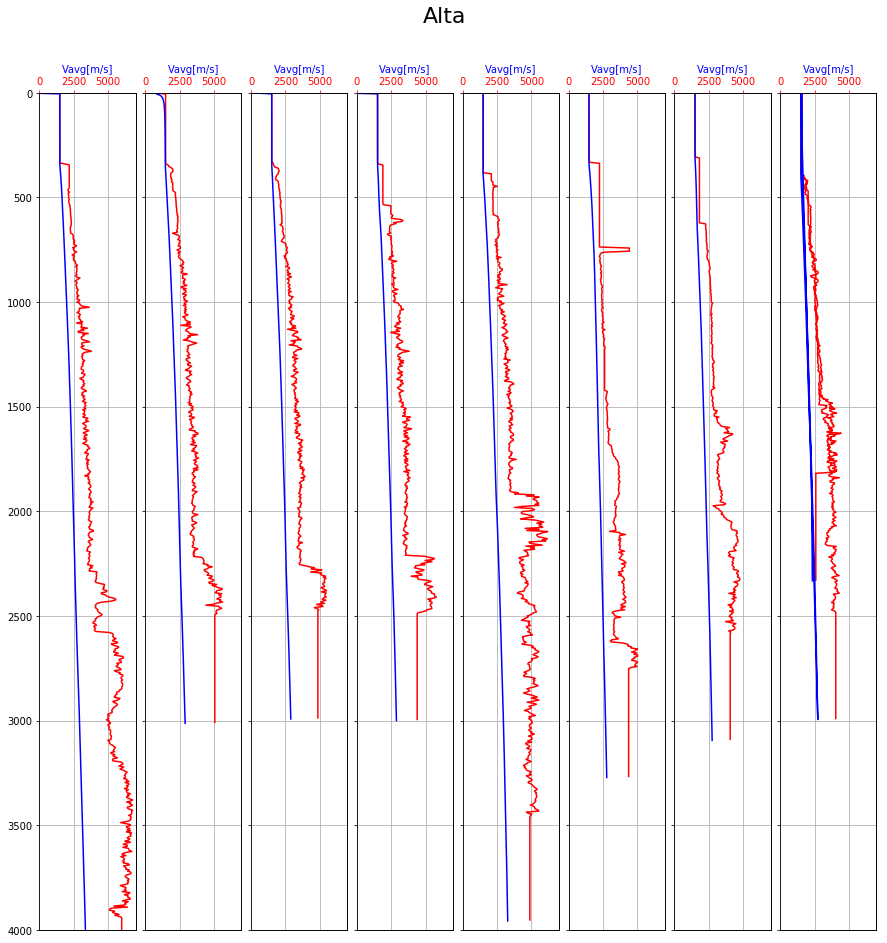

In [244]:
velocity_logs(0, 4000)

In [243]:
colors = ["red", "blue", "green", "orange", "black", "purple", "pink", "teal"]

def velocity_logs(top_depth, bottom_depth):
    
    logs=data1[(data1.TVDSS >= top_depth) & (data1.TVDSS <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(15,15), sharey=True)
    fig.suptitle("Alta", fontsize=22)
    fig.subplots_adjust(top=0.9,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
#        for (i,j) in zip(W7120_1_1_R2['TVDSS'], W7120_1_1_R2['Surface']):
#            if ((i>=top_depth) and (i<=bottom_depth)):
#                axes.axhline(y=i, linewidth=0.5, color='black')
#                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')



    ax[0]=ax[0].twiny()
    ax[0].grid(True)
    ax[0].set_xlim(0,7000)
    ax[0].spines['top'].set_position(('outward',0))
    ax[0].set_xlabel('Vint[m/s]')
    ax[0].plot(data1.Vint, data1.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[0].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[0].tick_params(axis='x', colors=colors[0])
    ax[0].set_xlabel('Vavg[m/s]')
    ax[0].plot(data1.Vavg, data1.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[0].set_xlabel('Vavg[m/s]', color=colors[1])

    ax[1]=ax[1].twiny()
    ax[1].grid(True)
    ax[1].set_xlim(0,7000)
    ax[1].spines['top'].set_position(('outward',0))
    ax[1].set_xlabel('Vint[m/s]')
    ax[1].plot(data2.Vint, data2.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[1].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[1].tick_params(axis='x', colors=colors[0])
    ax[1].set_xlabel('Vavg[m/s]')
    ax[1].plot(data2.Vavg, data2.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[1].set_xlabel('Vavg[m/s]', color=colors[1])
    
    ax[2]=ax[2].twiny()
    ax[2].grid(True)
    ax[2].set_xlim(0,7000)
    ax[2].spines['top'].set_position(('outward',0))
    ax[2].set_xlabel('Vint[m/s]')
    ax[2].plot(data3.Vint, data3.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[2].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[2].tick_params(axis='x', colors=colors[0])
    ax[2].set_xlabel('Vavg[m/s]')
    ax[2].plot(data3.Vavg, data3.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[2].set_xlabel('Vavg[m/s]', color=colors[1])

    ax[3]=ax[3].twiny()
    ax[3].grid(True)
    ax[3].set_xlim(0,7000)
    ax[3].spines['top'].set_position(('outward',0))
    ax[3].set_xlabel('Vint[m/s]')
    ax[3].plot(data4.Vint, data4.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[3].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[3].tick_params(axis='x', colors=colors[0])
    ax[3].set_xlabel('Vavg[m/s]')
    ax[3].plot(data4.Vavg, data4.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[3].set_xlabel('Vavg[m/s]', color=colors[1])

    ax[4]=ax[4].twiny()
    ax[4].grid(True)
    ax[4].set_xlim(0,7000)
    ax[4].spines['top'].set_position(('outward',0))
    ax[4].set_xlabel('Vint[m/s]')
    ax[4].plot(data5.Vint, data5.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[4].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[4].tick_params(axis='x', colors=colors[0])
    ax[4].set_xlabel('Vavg[m/s]')
    ax[4].plot(data5.Vavg, data5.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[4].set_xlabel('Vavg[m/s]', color=colors[1])

    ax[5]=ax[5].twiny()
    ax[5].grid(True)
    ax[5].set_xlim(0,7000)
    ax[5].spines['top'].set_position(('outward',0))
    ax[5].set_xlabel('Vint[m/s]')
    ax[5].plot(data6.Vint, data6.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[5].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[5].tick_params(axis='x', colors=colors[0])
    ax[5].set_xlabel('Vavg[m/s]')
    ax[5].plot(data6.Vavg, data6.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[5].set_xlabel('Vavg[m/s]', color=colors[1])

    ax[6]=ax[6].twiny()
    ax[6].grid(True)
    ax[6].set_xlim(0,7000)
    ax[6].spines['top'].set_position(('outward',0))
    ax[6].set_xlabel('Vint[m/s]')
    ax[6].plot(data7.Vint, data7.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[6].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[6].tick_params(axis='x', colors=colors[0])
    ax[6].set_xlabel('Vavg[m/s]')
    ax[6].plot(data7.Vavg, data7.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[6].set_xlabel('Vavg[m/s]', color=colors[1])

    ax[7]=ax[7].twiny()
    ax[7].grid(True)
    ax[7].set_xlim(0,7000)
    ax[7].spines['top'].set_position(('outward',0))
    ax[7].set_xlabel('Vint[m/s]')
    ax[7].plot(data8.Vint, data8.TVDSS, label='Vint[m/s]', color=colors[0])
    ax[7].set_xlabel('Vint[m/s]', color=colors[0])    
    ax[7].tick_params(axis='x', colors=colors[0])
    ax[7].set_xlabel('Vavg[m/s]')
    ax[7].plot(data8.Vavg, data8.TVDSS, label='Vavg[m/s]', color=colors[1])
    ax[7].set_xlabel('Vavg[m/s]', color=colors[1])

